In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [41]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [11]:
df.head(10)

,FISCAL YEAR,SENTENCE ID,OFFENDER NUMBER,RACE,RACE GROUPING,GENDER,AGE,IN CUSTODY/COMMUNITY,SUPERVISION TYPE,JURISDICTION,SENTENCE TYPE,AGGREGATE SENTENCE LENGTH,INSTITUTIONAL SECURITY LEVEL,PROVINCE,LOCATION TYPE,OFFENDER SECURITY LEVEL,DYNAMIC/NEED,STATIC/RISK,REINTEGRATION POTENTIAL,MOTIVATION,RELIGION,WARRANT ID,COURT,OFFENCE ID,OFFENCE DESCRIPTION,RACIAL CATEGORY,SENTENCE LENGTH (YEARS)
0,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073751,POSS PROH/RESTR F/ARM W/AMMUN,White,3.00
1,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073752,FAIL TO COMPLY W/ PROBATION ORDER,White,3.00
2,11-12,U40A00014615,82.507100,White,Non Indigenous,MALE,23,In Custody,NaN,FEDERAL,DETERMINATE,1096.0,MINIMUM,ONTARIO,FEDERAL INSTITU,MINIMUM,MEDIUM,LOW,HIGH,HIGH,CHRI NON SPEC,U40A00081680,ONT COURT OF JUSTICE,U40A00073753,POSS SCHEDULE I/II SUBST FOR PURP TRAFF,White,3.00
3,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029774,ASSAULT - USE OF FORCE,White,2.01
4,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00048789,VANCOUVER PROVINCIAL COURT,U80A00029785,ROBBERY - ALL OTHERS,White,2.01
5,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00050993,ABBOTSFORD PROVINCIAL COURT,U80A00031390,FTC W/ COND. OF UNDER.,White,2.01
6,11-12,U80A00008369,104.763470,White,Non Indigenous,MALE,39,In Custody,NaN,FEDERAL,DETERMINATE,732.0,MEDIUM,BRITISH COLUMBI,FEDERAL INSTITU,MEDIUM,HIGH,HIGH,LOW,MEDIUM,NONE,U80A00050993,ABBOTSFORD PROVINCIAL COURT,U80A00031391,FAIL TO APPEAR - APPEARANCE NOTICE,White,2.01
7,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,CNVR2F304626,ROBBERY,White,44.12
8,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,I53001001851,ESCAPE LAWFUL CUSTODY,White,44.12
9,11-12,CONVR2120173,151.424734,White,Non Indigenous,MALE,69,Community,DAY PAROLE,FEDERAL,DETERMINATE,16103.0,NaN,BRITISH COLUMBI,PAROLE OFFICE,MINIMUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,OTHER,CNVR2F155755,CLERK OF PROV. COURT,I53001001853,THEFT OVER,White,44.12


### Structure:

#### Initial Dataset Exploration 

* Offence description - see if there's a way of grouping offence types
* Group by offender number to get unique individuals
* Race breakdown in dataset
    * Also indigenous v. not indigenous
* Gender breakdown in dataset
* Age breakdown in dataset 
* Custody v. community 
* Get mean number of sentences by offender number / mean number of offences by offender number - there will likely be multiple offences per sentence. 
    * Get mean number of offences per sentence ID
* Number of sentences/ offences per offender in custody v. community 
* Jurisdiction breakdown 
* Supervision type by community 
* Translate institutional security level and offender security level into numbers and see what the mean difference is 
* Proportion of high reintegration potential individuals who are in custody v. community 
* Religion vs. reintegration potential 

#### Exploring Racial Bias 

* Sentence length by race 
* Number of sentences by race / number of offences by race - total and mean
* Mean difference between institutional security level and offender security level by race 
* Offender age by race 
* Racial breakdown in community vs. custody 
* Supervision type by community by race 
* Proportion of high reintegration potential individuals who are in custody v. community by race 

#### Gender Breakdown:

* Race breakdown by gender 
* Age by gender 
* Custody v. community 
* Supervision type by community by gender
* Mean number of sentences/ offences 
* Mean difference between institutional security level and offender security level by gender 
* Proportion of high reintegration potential individuals who are in custody v. community by gender 

#### Exploring Provincial Differences 

* Sentence length by province 
* Number of sentences/ offences by province 
* Mean difference between institutional security level and offender security level by province 

#### Exploring Differences by Year 

* Number of sentences by fiscal year / number of offences by fiscal year 
* Sentence length by year 


In [13]:
df.describe()

,OFFENDER NUMBER,AGE,AGGREGATE SENTENCE LENGTH,SENTENCE LENGTH (YEARS)
count,731785.000000,731785.000000,731785.000000,731785.000000
mean,499586.764529,40.380289,2046.865935,5.607670
std,288055.510209,13.368668,2693.821850,7.380387
min,1.006663,18.000000,0.000000,0.000000
25%,251716.317500,30.000000,761.000000,2.080000
50%,497154.805000,38.000000,1281.000000,3.510000
75%,750048.793500,50.000000,2253.000000,6.170000
max,999982.260000,95.000000,43761.000000,119.890000


In [14]:
df.shape

(731785, 27)

In [15]:
df['OFFENCE DESCRIPTION'].unique()

array(['POSS PROH/RESTR F/ARM W/AMMUN',
       'FAIL TO COMPLY W/ PROBATION ORDER',
       'POSS SCHEDULE I/II SUBST FOR PURP TRAFF',
       'ASSAULT - USE OF FORCE', 'ROBBERY - ALL OTHERS',
       'FTC W/ COND. OF UNDER.', 'FAIL TO APPEAR - APPEARANCE NOTICE',
       'ROBBERY', 'ESCAPE LAWFUL CUSTODY', 'THEFT OVER',
       'UNLAWFULLY AT LARGE', 'POSS PROP OBT BY CRIME - OVER',
       'BREAK ENTER W/INTENT', 'PRISON BREACH WITH INTENT', 'ATTEMPT',
       'POSSESS PROHIBITED WEAPON', 'USE OF FIREARM WHILE COMMITTING',
       'POSS PROP OBT BY CRIME-OVER', 'UTTER FORGED DOCUMENT', 'FORGERY',
       'POSS PROP OBT BY CRIME - UNDER', 'THEFT UNDER',
       'IMPAIRED DRIVING', 'POSSESS WEAPON/DANG PURPOSE',
       'MISCHIEF IN RELATION TO PROPERTY - OVER', 'ASSAULT WITH A WEAPON',
       'DRIVE MORE 80 MGS', 'OFFENCE UNDER TRAFFIC SAFETY ACT - SASK',
       'FALSE PRETENCES - UNDER', 'POSSESS NARCOTIC FOR PURP TRAFFICKING',
       'OFFENCE UNDER PROV STATUTES OF SASK.', 'FRAUD UNDER',
     

Possible distinguishing words: 
* AGGRAVATED
* SEXUAL
* MURDER
* KIDNAP
* ARMED
* CHILD PORNOGRAPHY
* RAPE
* ABDUCTION
* HOSTAGE
* TRAFFICKING PERSONS
* TRAFFIC IN PERSONS

Let's get a sense of how many individual records vs. offenders in the dataset. From `df.shape` we could see there are 731,785 records. Let's see how many offenders are contained in these records.

In [31]:
len(df.groupby('OFFENDER NUMBER'))

48844

We'll go between grouping by offenders, sentences, and offences throughout the exploration. Let's look at the racial breakdown by offender, and also focus in on the breakdown between indigenous and non-indigenous groups.

In [75]:
df_off = df.groupby(['OFFENDER NUMBER', 'RACE GROUPING', 'RACIAL CATEGORY'])['OFFENCE ID'].count().reset_index()
df_off.head()

,OFFENDER NUMBER,RACE GROUPING,RACIAL CATEGORY,OFFENCE ID
0,1.006663,Indigenous,Indigenous,1
1,1.006663,Non Indigenous,Multi-Ethic,5
2,82.507100,Non Indigenous,White,9
3,104.763470,Non Indigenous,White,8
4,107.090843,Non Indigenous,White,9


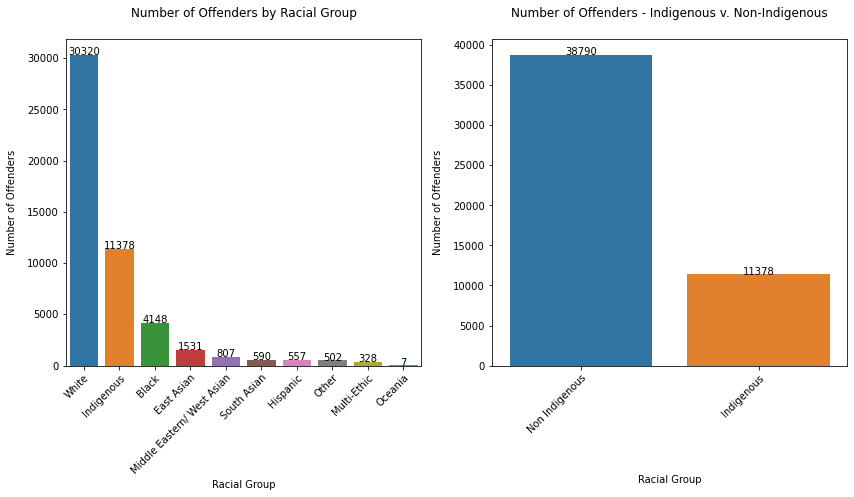

In [135]:
sns.color_palette("colorblind")

def show_values_on_bars(axis):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axis)

fig, ax = plt.subplots(1,2, figsize = (14,6))

#Set figure size 

#First countplot 
ax[0].set_title('Number of Offenders by Racial Group', fontsize= 12, y =1.05) 
sns.countplot(x='RACIAL CATEGORY', data=df_off, order = df_off['RACIAL CATEGORY'].value_counts().index, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right",rotation_mode='anchor')
show_values_on_bars(ax[0])  
ax[0].set_xlabel("Racial Group")
ax[0].set_ylabel("Number of Offenders",labelpad=10)

#Second countplot

ax[1].set_title("Number of Offenders - Indigenous v. Non-Indigenous", fontsize=12, y=1.05)
sns.countplot(x='RACE GROUPING', data=df_off, order = df_off['RACE GROUPING'].value_counts().index, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right",rotation_mode='anchor')
show_values_on_bars(ax[1])
ax[1].set_xlabel("Racial Group", labelpad=40)
ax[1].set_ylabel("Number of Offenders",labelpad=10) 

plt.show()

In [62]:
df.groupby('OFFENDER NUMBER')['RACIAL CATEGORY'].bar(legend=True)

AttributeError: 'SeriesGroupBy' object has no attribute 'bar'